<a href="https://colab.research.google.com/github/Fet-elena/proba/blob/main/Task_5_Fetisova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
from scipy.stats import cauchy
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [27]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine

norm_rv = sts.cauchy()
sample = norm_rv.rvs(100)
sample

array([ 1.02523389e+00,  3.04033300e-01,  2.42670979e+00,  2.05175211e+00,
       -4.38547267e+00,  4.39654603e-01, -2.19358497e+00, -2.09631238e+00,
        2.45254682e+00,  1.88794979e+00,  1.01444875e+00, -8.65355849e+01,
        1.27790014e+01,  2.14363483e+00, -9.90168527e-01, -7.36249173e-01,
       -2.24622117e-01, -9.46291465e-01,  5.57118734e-01, -9.15507887e+00,
       -4.85276864e-01,  6.28905463e+00, -8.72442820e-01,  1.10861457e-01,
       -5.55197488e+00, -3.10857880e+00,  9.22770953e-03, -1.49835711e+00,
        5.48745486e-01,  2.36832639e-01, -2.99856541e-01,  3.78914431e+00,
        1.01040463e+00, -5.66394243e+00,  1.94294959e+00,  1.27424226e+00,
        2.30768836e+00, -8.36834433e-01, -2.95408714e-01, -2.27906083e+00,
       -9.61876713e-02,  2.49771087e+00, -9.50299214e-01,  1.37673428e+00,
       -4.02289757e+00,  1.23232672e+00,  2.56393704e+00,  4.75271474e-01,
       -2.73521947e-01, -9.03840633e-01,  1.19152415e+00, -1.15970984e+01,
       -4.07821289e-01,  

In [28]:
sample.dtype

dtype('float64')

In [29]:
real_mean = norm_rv.mean() # настоящее среднее случайной величины
real_mean

nan

In [30]:
real_var = norm_rv.var() # настоящая дисперсия случайной величины
real_var

nan

### Постройте гистограмму выборки и теоретическую плотность распределения

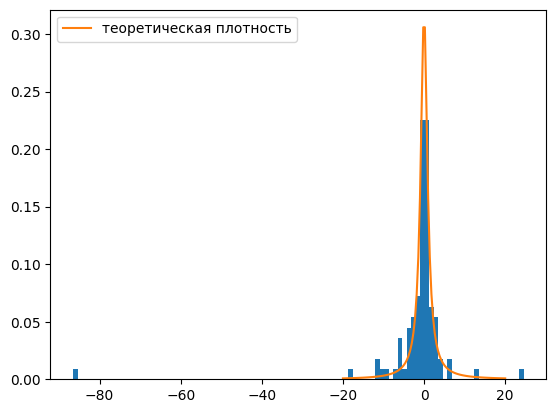

In [55]:
# ваш код тут
plt.hist(sample, density=True, bins = 100)
x = np.linspace(-20,20,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend()

In [56]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-1.300341660967896
93.95266561942843


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

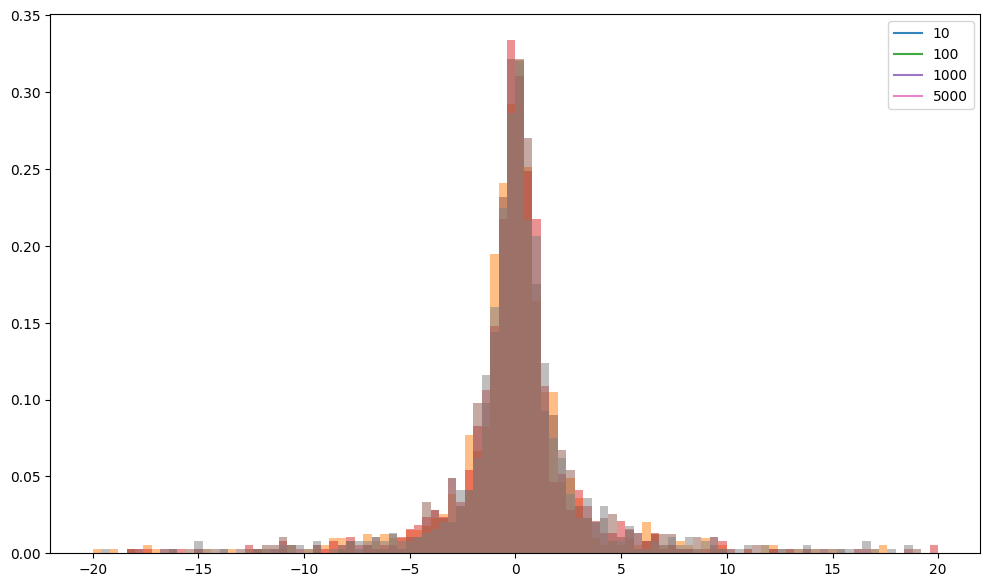

In [58]:
plt.figure(figsize=(12,7))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 5000]:
    means = []
    for i in range(1000):
         means.append(np.mean(norm_rv.rvs(size= N)))
    norm_rv_theoretic = sts.norm(loc=norm_rv.mean(), scale=norm_rv.std() / np.sqrt(N))
    x = np.linspace(-20,20, 100)
    pdf = norm_rv_theoretic.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.9)
    plt.hist(means, alpha=0.5, bins= 100, range = [-20,20], density = True)


plt.legend(['10', '100', '1000', '5000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:** Вывод сделать невозможно, так как отсутствует теоретеческое распределение, потому что распределение коши не имеет мат. ожидание и дисперсию

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [59]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [64]:
df1 = df[(df['churn'] == True)]
df2 = df[(df['churn'] == False)]
N1 = df1.shape[0]
N2 = df2.shape[0]

In [67]:
print("Доверительный интервал для среднего по цпт по тем, кто ушел. (интервальная оценка): {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(df1['total day calls']),
                      scale=np.std(df1['total day calls'], ddof=1)/np.sqrt(N1-1))
))

print("Доверительный интервал для среднего по цпт по тем, кто ушел методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df1['total day calls']),  np.std(df1['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт по тем, кто ушел. (интервальная оценка): (99.40866670589261, 103.26214074752355) 
Доверительный интервал для среднего по цпт по тем, кто ушел методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [68]:
print("Доверительный интервал для среднего по цпт по тем, кто остался. (интервальная оценка): {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(df2['total day calls']),
                      scale=np.std(df2['total day calls'], ddof=1)/np.sqrt(N2-1))
))

print("Доверительный интервал для среднего по цпт по тем, кто остался методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df2['total day calls']),  np.std(df2['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт по тем, кто остался. (интервальная оценка): (99.55606076109109, 101.0102550283826) 
Доверительный интервал для среднего по цпт по тем, кто остался методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 


Вывод: значения доверительного интервала, рассчитанные разными способами, приблизительно равны.

Можно сказать, что количество звонков не характеризует вероятность ухода
